<a href="https://colab.research.google.com/github/saulantonine/Redes-Neuronales/blob/main/Color_predominante_en_cubo_Rubik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import json
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras import layers, models


In [10]:

# Estableciendo valores numericos a las cadenas
COLOR = {
    "r": 0,
    "v": 1,
    "z": 2,
    "a": 3,
    "n": 4,
    "b": 5,
    "none": 6  # para empates se usa "none"
}


In [11]:
# Diccionario que traduce numeros a letras
NUM_COLOR = {v: k for k, v in COLOR.items()}

<Figure size 2000x2000 with 0 Axes>

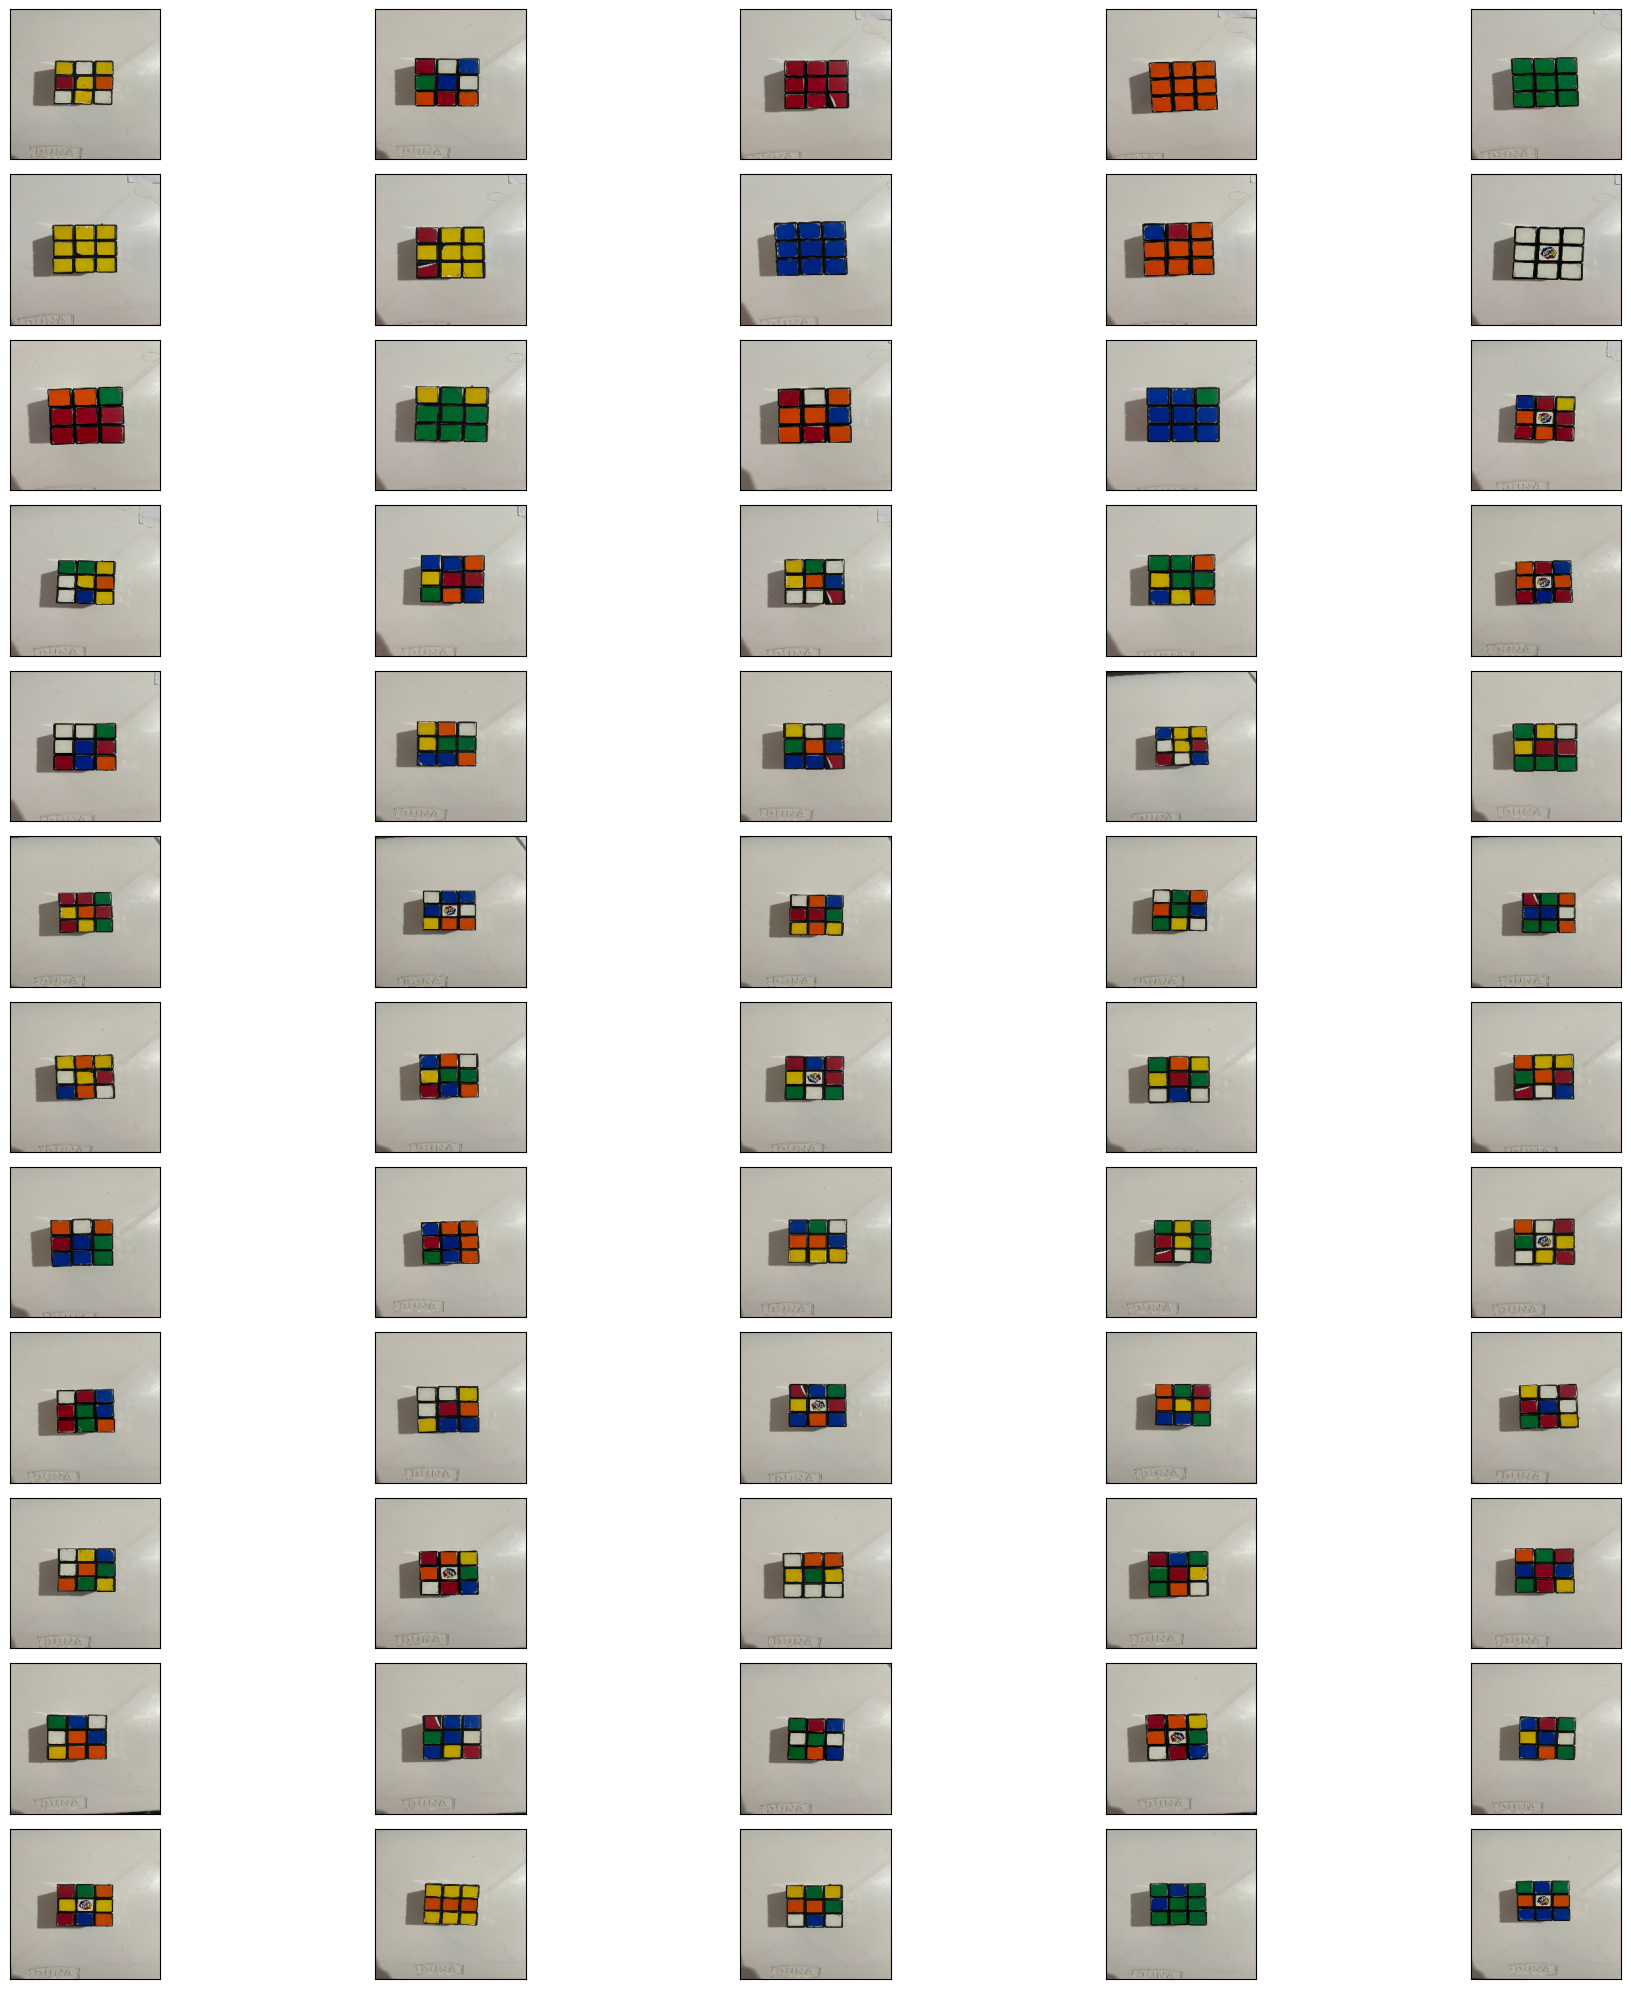

In [12]:
import matplotlib.pyplot as plt
import cv2

# Visualizacion de imagenes

plt.figure(figsize=(20,20))

TAMANO_IMG=224

archivo = "etiquetas.json"
carpeta_imagenes = "Imagenes"


with open(archivo, "r") as a:
        contenido = json.load(a)

num_images = len(contenido)
num_cols = 5
num_rows = (num_images + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))

axes = axes.flatten()


for i, (nombre_img, color_predom) in enumerate(contenido.items()):
  directorio_img = os.path.join(carpeta_imagenes, nombre_img)
  imagen = cv2.imread(directorio_img)
  imagen = cv2.resize(imagen, (TAMANO_IMG, TAMANO_IMG))
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

  axes[i].imshow(imagen)
  axes[i].set_xticks([])
  axes[i].set_yticks([])

plt.tight_layout()
plt.show()

In [13]:

# Manipulacion de set de datos
def set_datos(archivo, carpeta):
    with open(archivo, "r") as f:
        contenido = json.load(f)

    imagenes = []
    etiquetas = []

    for nombre_img, color_predom in contenido.items():
        # Cargar y normalizar
        dir_img = os.path.join(carpeta, nombre_img)
        imagen = tf.keras.utils.load_img(dir_img, target_size=(224, 224))
        imagen = tf.keras.utils.img_to_array(imagen) / 255.0  # Normalizar a [0, 1]

        # De color a numero con el caso en el que no halla color predominante
        if color_predom == 0:
            etiqueta_num = COLOR["none"]
        else:
            etiqueta_num = COLOR[color_predom]

        imagenes.append(imagen)
        etiquetas.append(etiqueta_num)

    return np.array(imagenes), np.array(etiquetas)

In [14]:

# modelo CNN
def crear_modelCNN():
    modeloCNN = models.Sequential([
        layers.Input(shape=(224, 224, 3)),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(7, activation='softmax')  # 7 classes (6 colors + none)
    ])
    return modeloCNN

In [15]:


# nombres de archivo y carpeta
archivo = "etiquetas.json"
carpeta = "Imagenes"


imagenes, etiquetas = set_datos(archivo, carpeta)

X_train, X_val, y_train, y_val = train_test_split(imagenes, etiquetas, test_size=0.2, random_state=42)

modelo = crear_modelCNN()
modelo.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

modelo.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
)

perdida, precision = modelo.evaluate(X_val, y_val)
print(f"Precision de validacion: {precision:.2f}")

# Guardar
modelo.save("cubo_rubik_color_predominante.h5")

# Evaluar el modelo con imagenes nuevas
predicciones = modelo.predict(X_val[:5])  # Usando 5 imagenes de validacion
color_predecido = np.argmax(predicciones, axis=1)

print("Predicciones:")
for i, pred in enumerate(color_predecido):
    print(f"Imagen {i + 1}: Color: {NUM_COLOR[pred]}, Color Real: {NUM_COLOR[y_val[i]]}")


Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.1632 - loss: 3.8983 - val_accuracy: 0.1667 - val_loss: 3.2835
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.0972 - loss: 4.5332 - val_accuracy: 0.1667 - val_loss: 1.8828
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.1389 - loss: 2.0319 - val_accuracy: 0.1667 - val_loss: 1.9396
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.1250 - loss: 1.9407 - val_accuracy: 0.0833 - val_loss: 1.9660
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.2257 - loss: 1.9240 - val_accuracy: 0.0000e+00 - val_loss: 2.0786
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.1632 - loss: 1.9180 - val_accuracy: 0.0000e+00 - val_loss: 2.0358
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.2569 - loss: 1.8609 - val_accuracy: 0.1667 - val_loss: 2.0409
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.2153 - loss: 1.9103 - val_accuracy: 0.1667 - val_loss: 1.9870
Epoch 

Precision de validacion: 0.42
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
Predicciones:
Imagen 1: Color: a, Color Real: a
Imagen 2: Color: a, Color Real: a
Imagen 3: Color: none, Color Real: n
Imagen 4: Color: v, Color Real: none
Imagen 5: Color: z, Color Real: z
